In [1]:
import keepsake
import pandas as pd
import numpy as np

from validation_utils import transform_data_for_inference, line_color, downsample_df, run_inference, calculate_error, run_validation, filter_df_by_signals

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.style.use('ggplot')

%matplotlib inline

In [2]:
keepsake.experiments.list(lambda exp: 
                              exp.params['accuracy'] == 1.0
                              and exp.params['model'] == 'random_forest'
                         )

═══╡ Failed to load metadata from "metadata/experiments/.DS_Store": Parse error: invalid character '\x00' looking for beginning of value


id,created,params,latest_checkpoint,best_checkpoint
78ad688,2021-06-11 18:36:04.393607,"{'f1': 1, 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y'], 'model': 'random_forest', 'dataset_test_size': 0.35, 'n_estimators': 4, 'feature_count': 5, 'recall': 1, 'accuracy': 1, 'precision': 1, 'other_params': 'default', 'quantization': None, 'hz': 20, 'data_set': 'base'}",cf9d863 (step 0; recall: 1),cf9d863 (step 0; recall: 1)
d5da9fe,2021-06-11 18:36:05.494630,"{'data_set': 'base', 'accuracy': 1, 'n_estimators': 5, 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y'], 'f1': 1, 'quantization': None, 'recall': 1, 'precision': 1, 'feature_count': 5, 'other_params': 'default', 'dataset_test_size': 0.35, 'hz': 20, 'model': 'random_forest'}",5f27590 (step 0; recall: 1),5f27590 (step 0; recall: 1)
5b65d1f,2021-06-11 18:36:06.563546,"{'precision': 1, 'n_estimators': 6, 'feature_count': 5, 'other_params': 'default', 'quantization': None, 'f1': 1, 'accuracy': 1, 'hz': 20, 'recall': 1, 'data_set': 'base', 'model': 'random_forest', 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y'], 'dataset_test_size': 0.35}",16fff24 (step 0; recall: 1),16fff24 (step 0; recall: 1)
2c811ab,2021-06-11 18:36:07.637670,"{'recall': 1, 'dataset_test_size': 0.35, 'precision': 1, 'feature_count': 5, 'model': 'random_forest', 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_z'], 'f1': 1, 'accuracy': 1, 'n_estimators': 4, 'hz': 20, 'quantization': None, 'other_params': 'default', 'data_set': 'base'}",c84f79e (step 0; recall: 1),c84f79e (step 0; recall: 1)
628e029,2021-06-11 18:36:11.523512,"{'accuracy': 1, 'feature_count': 5, 'data_set': 'base', 'hz': 50, 'f1': 1, 'precision': 1, 'quantization': None, 'dataset_test_size': 0.35, 'other_params': 'default', 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y'], 'n_estimators': 6, 'model': 'random_forest', 'recall': 1}",d04857d (step 0; recall: 1),d04857d (step 0; recall: 1)
232d3ae,2021-06-11 18:36:12.643836,"{'other_params': 'default', 'hz': 50, 'n_estimators': 6, 'feature_count': 5, 'accuracy': 1, 'quantization': None, 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_z'], 'model': 'random_forest', 'precision': 1, 'f1': 1, 'data_set': 'base', 'recall': 1, 'dataset_test_size': 0.35}",0eab042 (step 0; recall: 1),0eab042 (step 0; recall: 1)
f28b45c,2021-06-11 18:36:13.792155,"{'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'], 'dataset_test_size': 0.35, 'f1': 1, 'feature_count': 6, 'n_estimators': 5, 'precision': 1, 'quantization': None, 'recall': 1, 'hz': 50, 'model': 'random_forest', 'accuracy': 1, 'other_params': 'default', 'data_set': 'base'}",e6409a1 (step 0; recall: 1),e6409a1 (step 0; recall: 1)


In [3]:
keepsake.experiments.list(lambda exp:
                              exp.params['accuracy'] == 1.0
                              and exp.params['model'] == 'decision_tree'
                        )

id,created,params,latest_checkpoint,best_checkpoint
30462fd,2021-06-11 18:36:14.962589,"{'accuracy': 1, 'f1': 1, 'recall': 1, 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_x'], 'dataset_test_size': 0.35, 'hz': 25, 'other_params': 'default', 'quantization': None, 'model': 'decision_tree', 'feature_count': 4, 'n_estimators': None, 'data_set': 'base', 'precision': 1}",eafbd06 (step 0; recall: 1),eafbd06 (step 0; recall: 1)
36284c7,2021-06-11 18:36:16.018638,"{'feature_count': 4, 'hz': 25, 'precision': 1, 'data_set': 'base', 'f1': 1, 'dataset_test_size': 0.35, 'other_params': 'default', 'recall': 1, 'n_estimators': None, 'model': 'decision_tree', 'quantization': None, 'accuracy': 1, 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_y']}",727383b (step 0; recall: 1),727383b (step 0; recall: 1)
4edbe66,2021-06-11 18:36:17.069445,"{'model': 'decision_tree', 'f1': 1, 'data_set': 'base', 'features': ['acc_x', 'acc_y', 'acc_z', 'gyro_z'], 'recall': 1, 'dataset_test_size': 0.35, 'hz': 25, 'other_params': 'default', 'n_estimators': None, 'precision': 1, 'quantization': None, 'feature_count': 4, 'accuracy': 1}",55f4a25 (step 0; recall: 1),55f4a25 (step 0; recall: 1)


In [4]:
from models.optimized.base.random_forest import random_forest_78ad688 as rf_1 # 20hz
from models.optimized.base.random_forest import random_forest_628e029 as rf_2 # 50hz

from models.optimized.base.decision_tree import decision_tree_30462fd as dt_1 # 25hz
from models.optimized.base.decision_tree import decision_tree_36284c7 as dt_2 # 25hz

In [5]:
rf_1_settings = keepsake.experiments.get('78ad688').params
rf_2_settings = keepsake.experiments.get('628e029').params

dt_1_settings = keepsake.experiments.get('30462fd').params
dt_2_settings = keepsake.experiments.get('36284c7').params

In [6]:
from models.baseline.base.random_forest import random_forest_20hz
from models.baseline.base.random_forest import random_forest_50hz

from models.baseline.base.decision_tree import decision_tree_25hz

In [7]:
# tuple format (loaded model, hz, plot coordinates, model name, id, stage, signals/features)

model_setups = [
#     (rf_1, rf_1_settings['hz'], (0,0), rf_1_settings['model'], 1,'optimized', rf_1_settings['features']),
#     (random_forest_20hz, 20, (1,0), 'random_forest', 'full', 1,['acc_x','acc_y', 'acc_z','gyro_x','gyro_y','gyro_z']),
    
    (rf_2, rf_2_settings['hz'], (0,1), rf_2_settings['model'], 2,'optimized', rf_2_settings['features']),
    (random_forest_50hz, 50, (1,1), 'random_forest', 'full', 2,['acc_x','acc_y','acc_z','gyro_x','gyro_y','gyro_z']),
    
#     (dt_1, dt_1_settings['hz'], (0,2), dt_1_settings['model'], 3,'optimized', dt_1_settings['features']),
#     (decision_tree_25hz, 25, (1,2), 'random_forest', 'full', 3,['acc_x','acc_y', 'acc_z','gyro_x','gyro_y','gyro_z']),
    
#     (dt_2, dt_2_settings['hz'], (0,3), dt_2_settings['model'], 4,'optimized', dt_2_settings['features']),
#     (decision_tree_25hz, 25, (1,3), 'random_forest', 'full', 4,['acc_x','acc_y', 'acc_z','gyro_x','gyro_y','gyro_z']),
    
]

In [12]:
def run_validation_optimized(model_setups, dataset_path, dataset, is_plot=False, is_save_results=False):
    validation_results = []
    
    if is_plot:
        fig, ax = plt.subplots(nrows=int(len(model_setups) / 2), ncols=2, sharey=True, sharex=True, figsize=(30,25))

        blue_patch = mpatches.Patch(color='blue', label='X Movement')
        red_patch = mpatches.Patch(color='red', label='Y Movement')
        green_patch = mpatches.Patch(color='green', label='Circle Movement')
        fig.legend(handles=[blue_patch, red_patch, green_patch])

        fig.tight_layout()

    for setup in model_setups:
        MODEL = setup[0]
        FREQ = setup[1]
        SIGNALS = setup[-1]
        STEP = (1000 / FREQ)
        COL = setup[2][0]
        ROW = setup[2][1]

        df_val = pd.read_csv(dataset_path).set_index('ms')
        
        # initialize empty dataset to collect results
        inf_results = pd.DataFrame([],columns=['start','end','result'])

        df_downsampled = downsample_df(df_val, period=STEP)
        df_filtered = filter_df_by_signals(df_downsampled, SIGNALS)
        df_inference = transform_data_for_inference(df_filtered)

        # generate a list of steps    
        inference_step = list(np.arange(0, df_val.index[-1] + 1 - 1010, step=STEP))
        
        results_for_plot = []

        for st in inference_step:
            res = np.argmax(run_inference(df_inference, MODEL, st, STEP))
            inf_results = pd.concat([inf_results, pd.DataFrame([{'start':st,'end':st+1000,'result':res}])], axis=0)

            if res in [1,2,3]:
                color = line_color(res)
                results_for_plot.append((color, st))
                
            
        # Plot signals
        if is_plot:
            ax[ROW][COL].plot(df_filtered)

            for r in results_for_plot:
                color_plot = r[0]
                st_plot = r[1]   

                ax[ROW][COL].axvline(x=st_plot+500, ymin=0, ymax=0.4, color=color_plot, alpha=0.4)    

        # get move from path    
        move = get_move_from_path(dataset_path)

        error_percentage = calculate_error(inf_results, move)
        validation_results.append(
            {
                'model':setup[-1],
                'hz':setup[1],
                'dataset':dataset,
                'error_percentage': error_percentage,
                'value_counts': inf_results['result'].value_counts()
            })

        if is_save_results:
            pd.DataFrame(validation_results).to_csv(f'output/validation_optim/val_res_{dataset}_{move}.csv', index=False)
        
    return validation_results

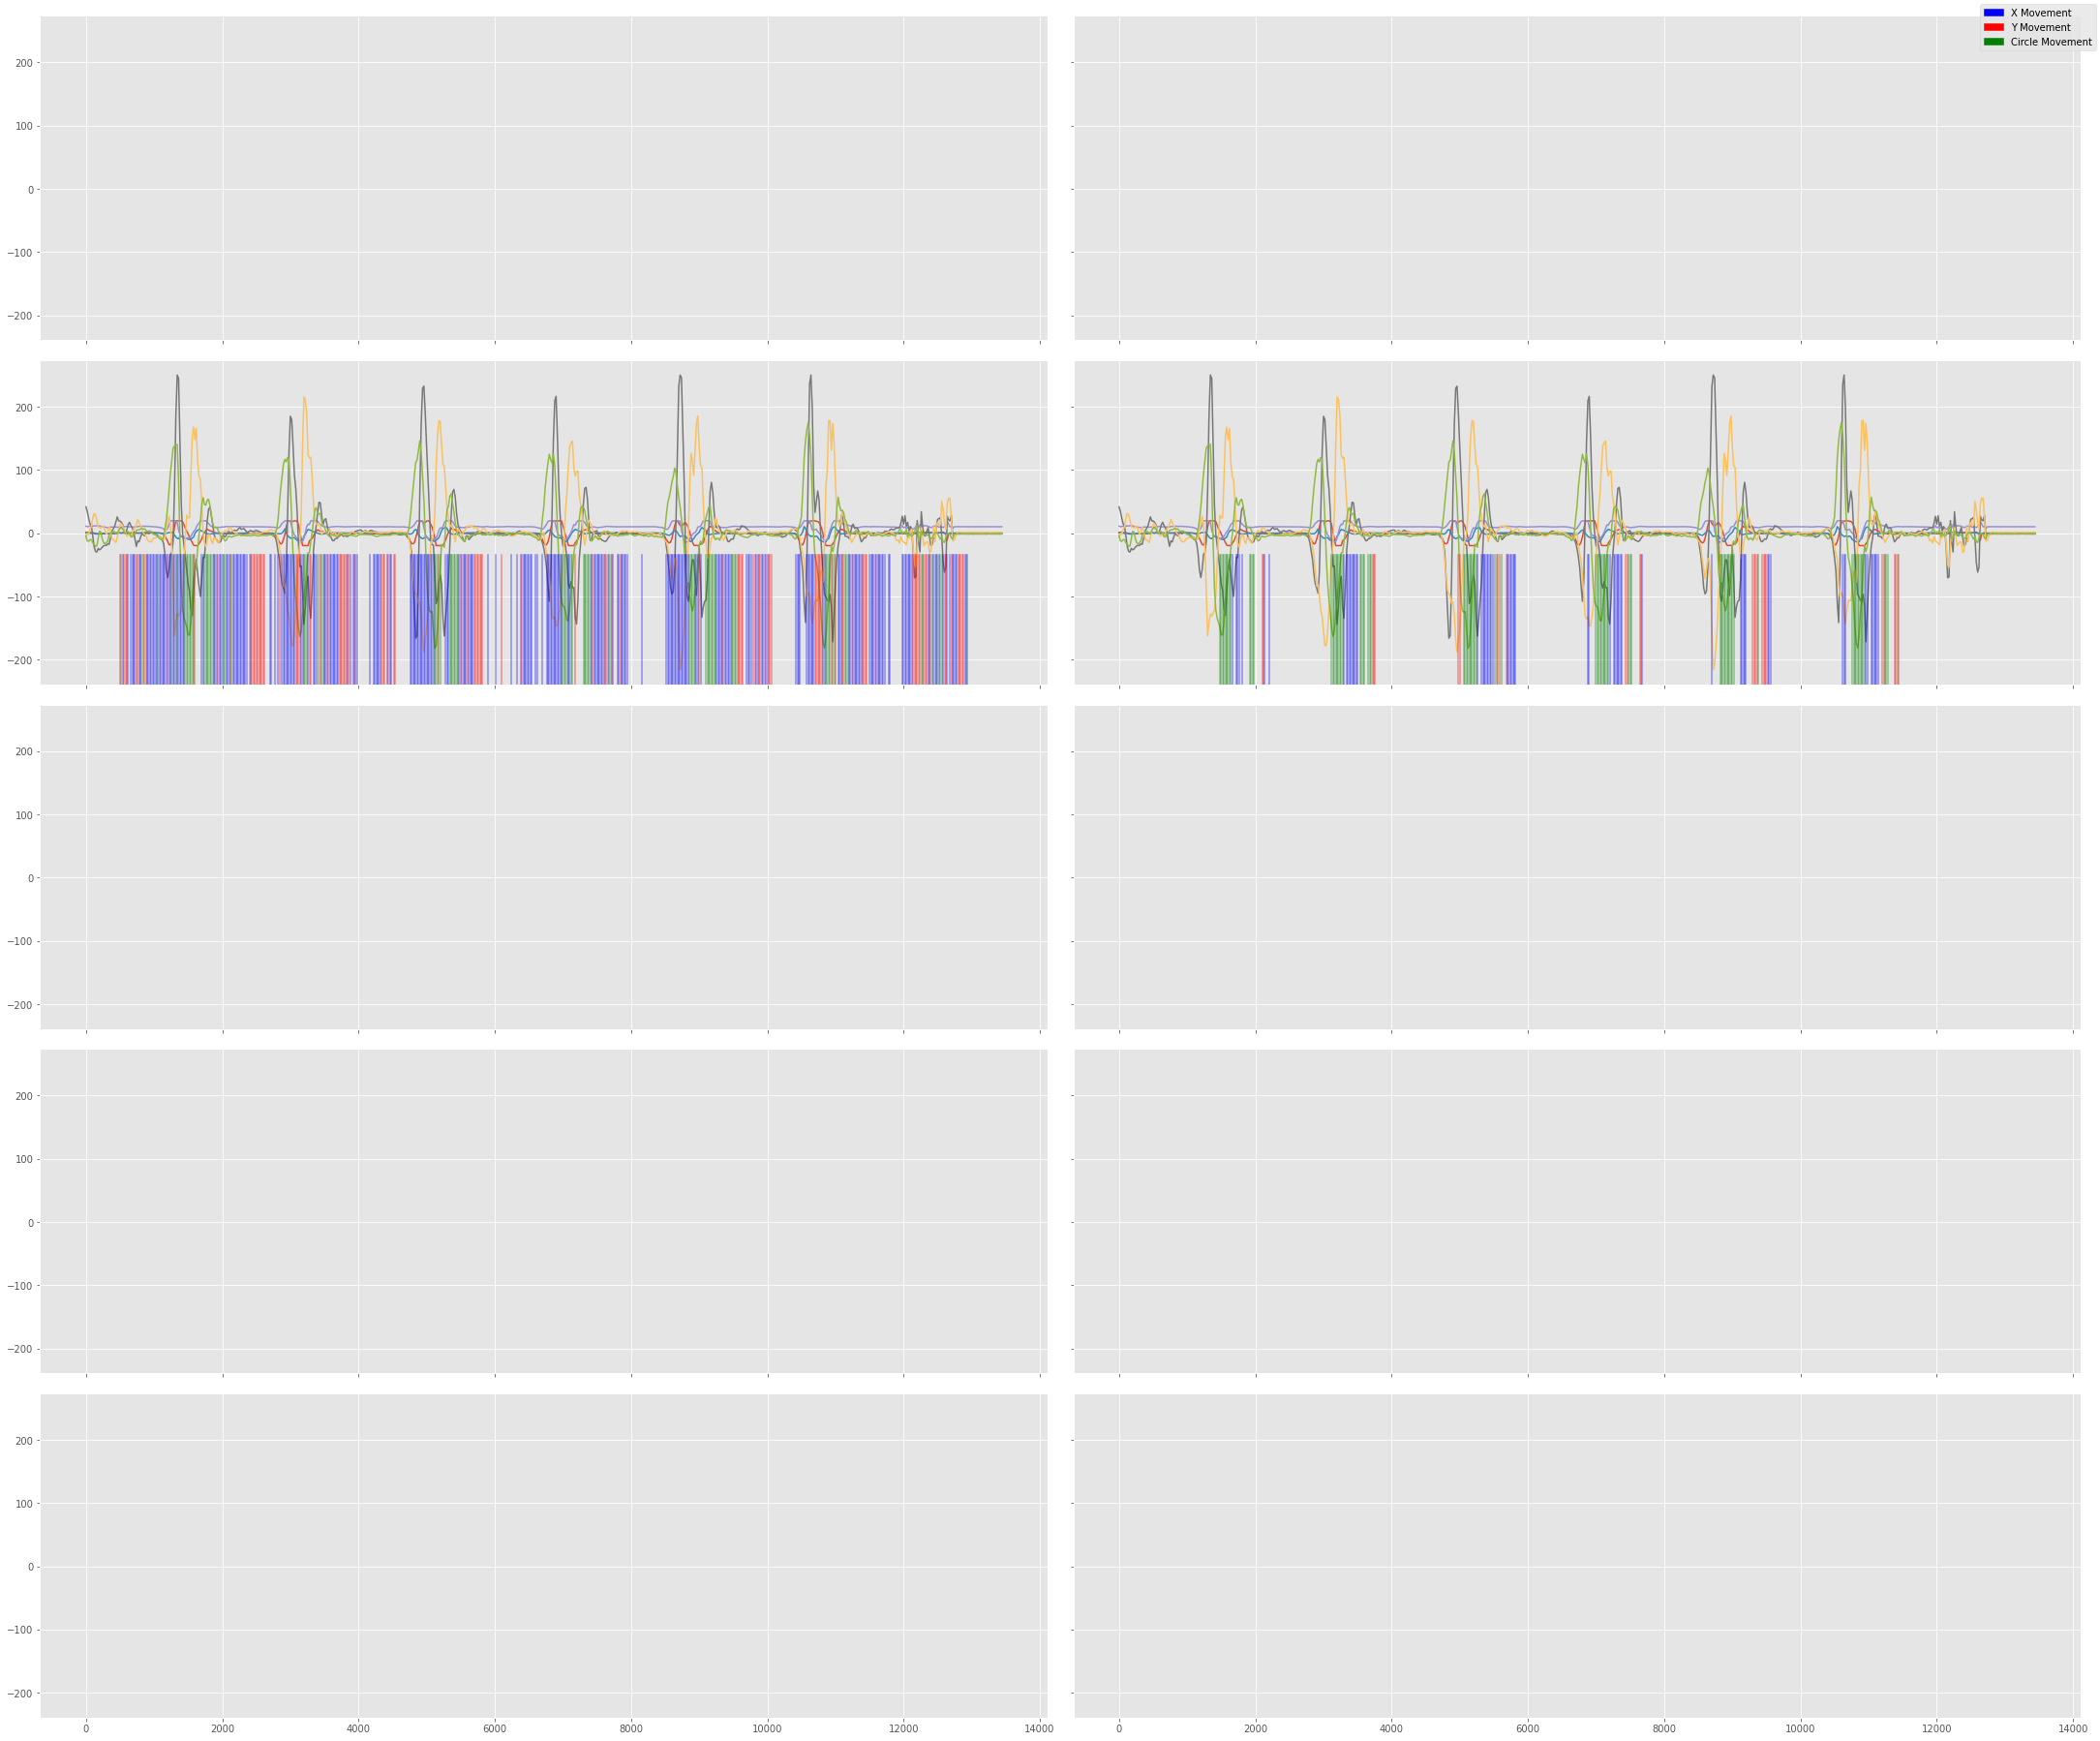

In [13]:
results = run_validation(model_setups, 'data/validation/move_circle_20210522_1.csv', 'baseline',True, False)